# 信号空间

## Python data model
You can think of the [data model](https://docs.python.org/3/reference/datamodel.html) as a description of Python as a framework. It formalizes the interfaces of the building blocks of the language itself, such as sequences, iterators, functions, classes, context managers, and so on.

While coding with any framework, you spend a lot of time implementing methods that are called by the framework. The same happens when you leverage the Python data model. The Python interpreter invokes special methods to perform basic object oper‐ ations, often triggered by special syntax. The special method names are always written with leading and trailing double underscores (i.e., `__getitem__`). For example, the syntax obj[key] is supported by the `__getitem__` special method. In order to evaluate `my_collection[key]`, the interpreter calls my_collection.`__getitem__(key)`.

The special method names allow your objects to implement, support, and interact with basic language constructs such as:
- Iteration
- Collections
- Attribute access
- Operator overloading
- Function and method invocation
- Object creation and destruction
- String representation and formatting
- Manage context (i.e. with _blocks_)

The following is a very simple example, but it demonstrates the power of implementing just two special methods, `__getitem__` and `__len__`.

### nametuple
*namedtuple* can be used to build classes of objects that are just bundles of attributes with no custom methods, like a database record. In the example, we use it to provide a nice representation for the cards in the deck, as shown in the following:

In [1]:
import collections

Card=collections.namedtuple('Card', ['rank', 'suit'])

Card('2','spades')

Card(rank='2', suit='spades')

### a pythonic card deck

In [2]:
class FrenchDeck:
    ranks = [str(n) for n in range(2,11)]+list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards=[Card(rank,suit) for suit in self.suits
                                    for rank in self.ranks]
        
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self,position):
        return self._cards[position]

### `__len__`

First, like any standard Python collection, a deck responds to the `len()` function by returning the number of cards in it:

In [3]:
deck=FrenchDeck()
len(deck)

52

### `___getitem__`

Reading specific cards from the deck—say, the first or the last—should be as easy as `deck[0]` or `deck[-1]`, and this is what the `__getitem__` method provides:

In [4]:
deck[0]

Card(rank='2', suit='spades')

In [5]:
deck[-1]

Card(rank='A', suit='hearts')

Should we create a method to pick a random card? No need. Python already has a function to get a random item from a sequence: `random.choice`. We can just use it on a deck instance:

In [6]:
from random import choice

choice(deck)

Card(rank='2', suit='hearts')

In [7]:
choice(deck)

Card(rank='J', suit='clubs')

We’ve just seen two advantages of using special methods to leverage the Python data model:
- The users of your classes don’t have to memorize arbitrary method names for stan‐ dard operations
- It’s easier to benefit from the rich Python standard library and avoid reinventing the wheel, like the `random.choice` function.

Because our `__getitem__` delegates to the `[]` operator of `self._cards`, our deck automatically supports *slicing*. Here’s how we look at the top three cards from a brand new deck, and then pick just the aces by starting on index `12` and skipping `13` cards at a time:

In [8]:
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [9]:
deck[12::13]

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

Just by implementing the `__getitem__` special method, our deck is also iterable:

In [10]:
for card in deck:
    print(card)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='K', suit='spades')
Card(rank='A', suit='spades')
Card(rank='2', suit='diamonds')
Card(rank='3', suit='diamonds')
Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='A', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='8', sui

The deck can also be iterated in reverse:

In [11]:
for card in reversed(deck):
    print(card)

Card(rank='A', suit='hearts')
Card(rank='K', suit='hearts')
Card(rank='Q', suit='hearts')
Card(rank='J', suit='hearts')
Card(rank='10', suit='hearts')
Card(rank='9', suit='hearts')
Card(rank='8', suit='hearts')
Card(rank='7', suit='hearts')
Card(rank='6', suit='hearts')
Card(rank='5', suit='hearts')
Card(rank='4', suit='hearts')
Card(rank='3', suit='hearts')
Card(rank='2', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='K', suit='clubs')
Card(rank='Q', suit='clubs')
Card(rank='J', suit='clubs')
Card(rank='10', suit='clubs')
Card(rank='9', suit='clubs')
Card(rank='8', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='2', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(r

Iteration is often implicit. If a collection has no `__contains__` method, the in operator does a sequential scan. Case in point: it works with our `FrenchDeck` class because it is iterable. Check it out:

In [12]:
Card('Q', 'hearts') in deck

True

In [13]:
Card('7', 'beasts') in deck

False

How about sorting? A common system of ranking cards is by rank (with aces being highest), then by suit in the order of spades (highest), then hearts, diamonds, and clubs (lowest). Here is a function that ranks cards by that rule, returning 0 for the 2 of clubs and 51 for the ace of spades:

In [14]:
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)

def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit]

In [15]:
for card in sorted(deck, key=spades_high):
    print(card)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='clubs')
Ca

Although `FrenchDeck` implicitly inherits from object, its functionality is not inherited, but comes from leveraging the data model and composition. By implementing the spe‐ cial methods `__len__` and `__getitem__`, our `FrenchDeck` behaves like a standard Python sequence, allowing it to benefit from core language features (e.g., iteration and slicing) and from the standard library, as shown by the examples using `random.choice`, reversed, and sorted. Thanks to composition, the `__len__` and `__getitem__` implementations can hand off all the work to a list object, `self._cards`.

### How special methods are used?

The first thing to know about special methods is that they are meant to be called by the Python interpreter, and not by you. You don’t write `my_object.__len__()`. You write `len(my_object)` and, if `my_object` is an instance of a user-defined class, then Python calls the `__len__` instance method you implemented.

But for built-in types like `list`, `str`, `bytearray`, and so on, the interpreter takes a short‐cut: the CPython implementation of `len()` actually returns the value of the `ob_size` field in the PyVarObject C struct that represents any variable-sized built-in object in memory. This is much faster than calling a method.

More often than not, the special method call is implicit. For example, the statement `for i in x:` actually causes the invocation of `iter(x)`, which in turn may call `x.__iter__()` if that is available.

Normally, your code should not have many direct calls to special methods. Unless you are doing a lot of metaprogramming, you should be implementing special methods more often than invoking them explicitly. The only special method that is frequently called by user code directly is `__init__`, to invoke the initializer of the superclass in your own `__init__` implementation.

If you need to invoke a special method, it is usually better to call the related built-in function (e.g., `len`, `iter`, `str`, etc). These built-ins call the corresponding special method, but often provide other services and — for built-in types — are faster than method calls. 

# The Signal Class
```{literalinclude} ../../../src/python/signal/qisignal.py
---
language: python
---
```

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, '../../../src/python/signal')
from qiplot import plot_ts
import qisignal
from qisignal import signal
plt.style.use(['ggplot','../../presentation.mplstyle'])

In [17]:
t=np.linspace(-1,1,64)

In [18]:
x=[1.0 if v>=0 else 0.0 for v in t]

In [19]:
sig=signal(t,x)

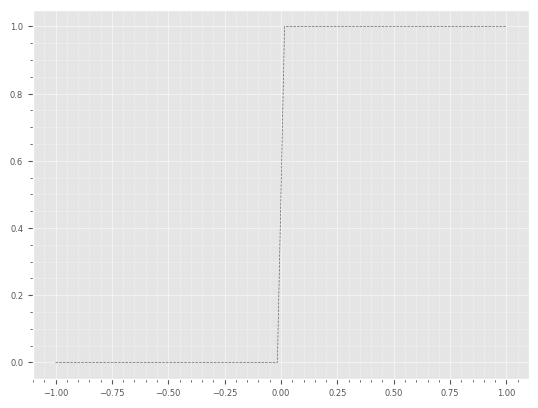

In [20]:
fig,ax=plt.subplots()
sig.plot(ax)

In [21]:
sig.shift(32)

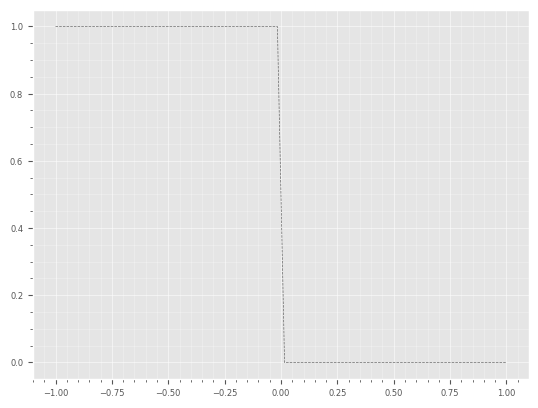

In [22]:
fig,ax=plt.subplots()
sig.plot(ax)